In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Подготовка датасета

In [9]:
# Изучаем датасет, смотрим, есть ли Nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
#смотрим уникальные значения в выбранных столбцах, посмотрим есть ли там отклонения (выбросы) от реальных значений

print(f'Age:{data.age.unique()}') #данные нормальные
print(f'Workclass:{data.workclass.unique()}') #проработать ?
print(f'Education:{data.education.unique()}') #данные нормальные
print('Marital-status: {}'.format(data['marital-status'].unique())) #данные нормальные
print('Occupation: {}'.format(data['occupation'].unique())) #проработать ?
print(f'Race:{data.race.unique()}') #данные нормальные
print(f'Gender:{data.gender.unique()}') #данные нормальные
print('Hours-per-week: {}'.format(data['hours-per-week'].unique())) #данные нормальные
print('Native-country: {}'.format(data['native-country'].unique())) #данные нормальные
print(f'Income:{data.income.unique()}') #данные нормальные

Age:[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
Workclass:['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Education:['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Race:['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
G

In [11]:
# посмотрим кол-во значений,равных ? в датафрейме
print('Для Workclass ? значения {}'.format(len(data[data['workclass'] == '?'])))
print('Для Occupation ? значения {}'.format(len(data[data['occupation'] == '?'])))
print('Для Native-country ? значения {}'.format(len(data[data['native-country'] == '?'])))

Для Workclass ? значения 2799
Для Occupation ? значения 2809
Для Native-country ? значения 857


In [12]:
#Заменим ? на Nan
#создаем рабочий датафрейм:
cleaned_data = data[['age','workclass','education','marital-status','occupation','race','gender','hours-per-week','native-country','income']]
cleaned_data = cleaned_data.applymap(lambda x: np.nan if x == '?' else x)
cleaned_data.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,NaN,Some-college,Never-married,NaN,White,Female,30,United-States,<=50K


#### Заменим пропуски

In [13]:
#заполним значения, равные ? на основании мод столбцов education и native-country
cleaned_data['workclass'] = cleaned_data.groupby(['education','native-country'])['workclass'].apply(lambda x: x.fillna(x.mode()[0] if len(x.mode()) else np.nan))
#заполним значения, равные ? на основании мод столбцов education и native-country
cleaned_data['occupation'] = cleaned_data.groupby(['education','native-country'])['occupation'].apply(lambda x: x.fillna(x.mode()[0] if len(x.mode()) else np.nan))
#оставшиеся пропуски workclass заменим модой столбца education и native-country для столбца occupation
cleaned_data['workclass'] = cleaned_data.groupby(['education'])['workclass'].apply(lambda x: x.fillna(x.mode()[0]))
cleaned_data['occupation'] = cleaned_data.groupby(['native-country'])['occupation'].apply(lambda x: x.fillna(x.mode()[0]))
#оставшиеся пропуски occupation заменим модой столбца race, education, gender
cleaned_data['occupation'] = cleaned_data.groupby(['race','education','gender'])['occupation'].apply(lambda x: x.fillna(x.mode()[0]))
#оставшиеся пропуски Native-country заменим модой столбца race, education, gender
cleaned_data['native-country'] = cleaned_data.groupby(['race','education','gender','occupation'])['native-country'].apply(lambda x: x.fillna(x.mode()[0]))



In [14]:
print('Для Occupation Nan значения {}'.format(len(cleaned_data[pd.isnull( cleaned_data['occupation'])])))
print('Для Workclass Nan значения {}'.format(len(cleaned_data[ pd.isnull( cleaned_data['workclass'])])))
print('Для Native-country Nan значения {}'.format(len(cleaned_data[ pd.isnull( cleaned_data['native-country'])])))

Для Occupation Nan значения 0
Для Workclass Nan значения 0
Для Native-country Nan значения 0


#### One-Hot-Encoding для целевой переменной

In [15]:
#Обозначим целевую переменную и переведем в бинарный вид 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(cleaned_data['income'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [16]:
# записываем в переменную y преобразованный столбец income
y = pd.Series(le.transform(cleaned_data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

#### Стандартизируем числовые величины, применяем One-Hot-Encoding к категориальным

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [18]:
X = cleaned_data[['age','workclass', 'education','marital-status','occupation','race','native-country','gender','hours-per-week']]
X.head()

,age,workclass,education,marital-status,occupation,race,native-country,gender,hours-per-week
0,25,Private,11th,Never-married,Machine-op-inspct,Black,United-States,Male,40
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,United-States,Male,50
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,United-States,Male,40
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,United-States,Male,40
4,18,Private,Some-college,Never-married,Adm-clerical,White,United-States,Female,30


In [19]:
#получим список категорий
columns_cat = [ 'workclass', 'education','marital-status','occupation','race','native-country','gender']
def categories(df, columns_cat):
    cat = []
    for column in columns_cat:
        cat.append(list(df[column].unique()))
    return cat
cat = categories(cleaned_data,columns_cat)
cat

[['Private',
  'Local-gov',
  'Self-emp-not-inc',
  'Federal-gov',
  'State-gov',
  'Self-emp-inc',
  'Without-pay',
  'Never-worked'],
 ['11th',
  'HS-grad',
  'Assoc-acdm',
  'Some-college',
  '10th',
  'Prof-school',
  '7th-8th',
  'Bachelors',
  'Masters',
  'Doctorate',
  '5th-6th',
  'Assoc-voc',
  '9th',
  '12th',
  '1st-4th',
  'Preschool'],
 ['Never-married',
  'Married-civ-spouse',
  'Widowed',
  'Divorced',
  'Separated',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 ['Machine-op-inspct',
  'Farming-fishing',
  'Protective-serv',
  'Adm-clerical',
  'Other-service',
  'Craft-repair',
  'Prof-specialty',
  'Exec-managerial',
  'Tech-support',
  'Sales',
  'Priv-house-serv',
  'Transport-moving',
  'Handlers-cleaners',
  'Armed-Forces'],
 ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'],
 ['United-States',
  'China',
  'Peru',
  'Guatemala',
  'Mexico',
  'Dominican-Republic',
  'Ireland',
  'Germany',
  'Philippines',
  'Thailand',
  'Haiti',
  'E

In [20]:
columns_num = ['age','hours-per-week'] #Список числовых величин
# Трансформируем колонки: числовые стандартизируем, категориальные - применяем One-Hot-Encoding
ct = ColumnTransformer(transformers = [
    ('one_hot', OneHotEncoder(categories = cat),columns_cat),
    ('st_sc', StandardScaler(), columns_num)
],
sparse_threshold = 0,
remainder = 'drop')

### Разделим выборку

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Строим логистическую регрессию

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [23]:
# Зададим значения lambda_:
lambda_ = [0.001,0.01,0.1,1,10,100,1000]
penalties = ['l1', 'l2']
results = {}

In [24]:
#запускаем лог регрессию для всех вариантов penalty и lambda_
for penalty in penalties:
    for C in lambda_:
        model = Pipeline(steps = [('ct', ct),
                            ('logreg', LogisticRegression(penalty = penalty, C = C, solver='liblinear'))])
        model.fit(X_train,y_train)
        y_pred = model.predict_proba(X_test)[:,1]
        results[penalty,C] = y_pred

### Находим tpr, fpr, строим ROC

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

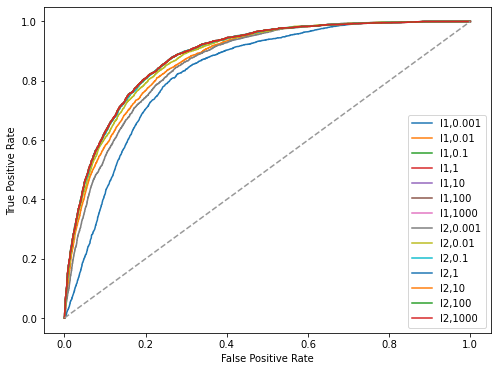

In [26]:
score = {}
plt.figure(figsize=(8, 6))
for (penalty,C), value in results.items():
    score[penalty,C] = roc_auc_score( y_test, value )
    fpr, tpr, thres = roc_curve(y_test, value)
    plt.plot( fpr, tpr, label = f'{penalty},{C}' )
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Построим график Precision-Recall

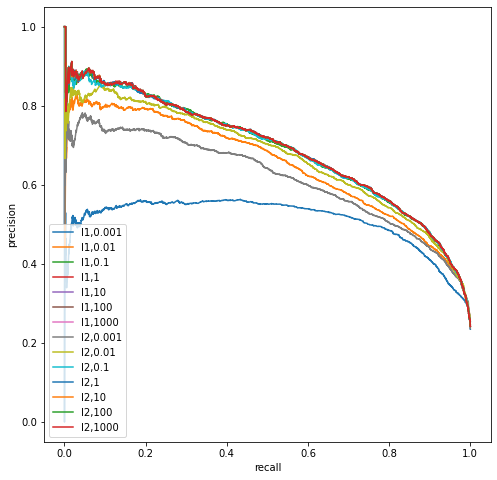

In [27]:
plt.figure(figsize=(8, 8))
for (penalty,C), value in results.items():
    precision, recall, thres = precision_recall_curve(y_test, value)
    plt.plot( recall, precision, label = f'{penalty},{C}' )
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='lower left')
plt.show()

### Найдем, какой вариант регресии наиболее оптимален (самая большая площадь под кривой)

In [28]:
{x: y for x, y in filter(lambda x: score[x[0]] == max(score.values()), score.items())}

{('l2', 1): 0.8847954778188536}

### Убедиться, что график ROC AUC получается таким же, как и автоматом (для гиперпараметров penalty 'l2', С=1)

In [30]:
import numpy as np
tres = np.linspace(1, 0, 20)
tres

array([1.        , 0.94736842, 0.89473684, 0.84210526, 0.78947368,
       0.73684211, 0.68421053, 0.63157895, 0.57894737, 0.52631579,
       0.47368421, 0.42105263, 0.36842105, 0.31578947, 0.26315789,
       0.21052632, 0.15789474, 0.10526316, 0.05263158, 0.        ])

In [43]:
#Модель логистической регрессии для получения tpr и fpr вручную
model2 = Pipeline(steps = [('ct', ct),
                            ('logreg', LogisticRegression(penalty = 'l2', C = 1, solver='liblinear'))])

In [44]:
model2.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('one_hot',
                                                  OneHotEncoder(categories=[['Private',
                                                                             'Local-gov',
                                                                             'Self-emp-not-inc',
                                                                             'Federal-gov',
                                                                             'State-gov',
                                                                             'Self-emp-inc',
                                                                             'Without-pay',
                                                                             'Never-worked'],
                                                                            ['11th',
                                        

In [47]:
tpr_hand = []
fpr_hand = []
for treshold in tres:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    
    predictions = model2.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
        if predicted_prob >= treshold:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
    
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    fpr_ = fp / (fp + tn)
    recall = tp / (tp + fn)
    tpr_hand.append(recall)
    fpr_hand.append(fpr_)

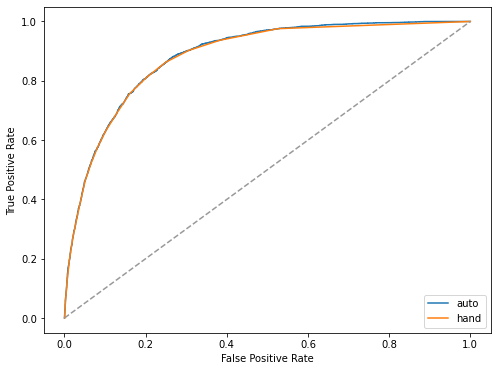

In [54]:
plt.figure(figsize=(8, 6))
value = results[('l2',1)] #оптимальный вариант, roc curve автоматом
fpr, tpr, thres = roc_curve(y_test, value)
plt.plot( fpr, tpr, label = 'auto' )
plt.plot(fpr_hand, tpr_hand, label = 'hand') 
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### Кривые совпали